In [1]:
#! jupyter nbconvert --to html dataset-preprocess.ipynb

In [2]:
import os
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# import random
# random.seed(42)
# np.random.seed(42)
# np.random.RandomState(42)
# os.environ['TF_DETERMINISTIC_OPS'] = '1' 

In [3]:
finish_sound = "afplay /Users/mehmet/Documents/vs-code/winsquare.mp3"
# play sound when finished
# os.system(finish_sound)

In [4]:
classes = ['Non_Demented','Very_Mild_Demented','Mild_Demented','Moderate_Demented']
folder_path = '/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
datafile = ['','','','']
dataframe = pd.DataFrame()
for i in range(len(classes)):
    datafile[i] = sorted(os.listdir(folder_path + classes[i]))
    filenames = pd.DataFrame(datafile[i], columns=['filename'])
    class_labels = pd.DataFrame(np.full((len(datafile[i]),1), classes[i]), columns=['class_label'])
    dataframe = pd.concat([dataframe, pd.concat([filenames, class_labels], axis=1)], axis=0)
dataframe = dataframe.reset_index(drop=True)
dataframe['class_label'] = dataframe['class_label'].str[:]
classes = dataframe['class_label'].unique()
dataframe.head()

,filename,class_label
0,non.jpg,Non_Demented
1,non_10.jpg,Non_Demented
2,non_100.jpg,Non_Demented
3,non_1000.jpg,Non_Demented
4,non_1001.jpg,Non_Demented


In [5]:
class_counts = []
for i in datafile:
    class_counts.append(len(i)) 
    print('There are',len(i),'images belonging to',classes[datafile.index(i)], 'class')
print('Total number of images:', sum(class_counts))

There are 3200 images belonging to Non_Demented class
There are 2240 images belonging to Very_Mild_Demented class
There are 896 images belonging to Mild_Demented class
There are 64 images belonging to Moderate_Demented class
Total number of images: 6400


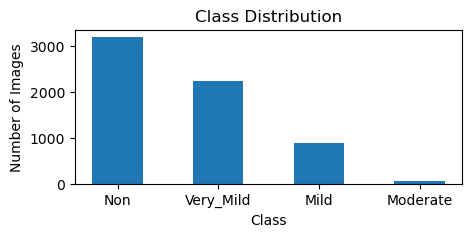

In [6]:
# Plot class distribution

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2)
bins = np.linspace(0 - .25, 3 + .25, 8)
ax.hist(dataframe['class_label'].str[:-9].values,bins=bins)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
plt.show()

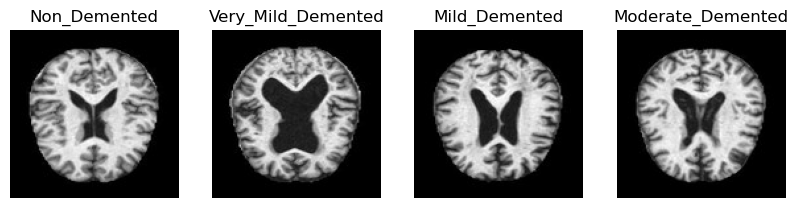

In [7]:
# Display 1 random images from each class

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(10, 5)
for i in range(len(classes)):
    for j in range(1):
        # get random image dataframe
        start = dataframe[dataframe['class_label']==classes[i]].first_valid_index()
        end = dataframe[dataframe['class_label']==classes[i]].last_valid_index() 
        sample = np.random.randint(start, end)-start
        dataframe[dataframe['class_label']==classes[i]].iloc[sample,0]
        random_image = dataframe[dataframe['class_label']==classes[i]].iloc[sample,0]
        filename = folder_path + classes[i] + '/' + random_image
        ax[i].imshow(plt.imread(filename), cmap='gray')
        ax[i].set_title(classes[i])
        ax[i].axis('off')
plt.show()

In [8]:
# Convert all images to numpy array and flatten them

folderpath ='/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
image_data = []
for instance in dataframe['filename']:
    # find class label
    folder_name = dataframe[dataframe['filename']==instance]['class_label'].values[0] + '/'
    image2 = plt.imread(folderpath+folder_name+instance)
    image2_flatten = image2.flatten().T
    image_data.append(image2_flatten)
image_arr = np.array(image_data)
output_labels = np.array(dataframe['class_label'].values)
image_arr.shape, output_labels.shape

((6400, 16384), (6400,))

In [9]:
# Create dataframe from image array

image_df = pd.DataFrame(image_arr)
# Rescale pixel values
#image_df = image_df/255
image_df.columns = image_df.columns.astype(str)
image_df['filename'] = dataframe['filename']
image_df['class_label'] = output_labels
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16376,16377,16378,16379,16380,16381,16382,16383,filename,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non.jpg,Non_Demented
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_10.jpg,Non_Demented
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_100.jpg,Non_Demented
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1000.jpg,Non_Demented
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1001.jpg,Non_Demented


In [10]:
def train_test_split(dataframe, test_size, validation_size=0, random_state=42):
    # Function to split pandas dataframe into train, test and validation sets
    """ Split data into train and test sets.
    Args:
        dataframe (pandas dataframe): Input Pandas Dataframe
        test_size (float): float between 0 and 1
        validation_size (float): float between 0 and 1
        random_state (int): random seed
    """
    class_labels = dataframe['class_label'].unique()
    dataframe = dataframe.sample(frac=1, random_state=random_state).reset_index(drop=True)
    train_size = 1 - test_size - validation_size
    # train 
    train_df = pd.DataFrame()
    for i in range(len(classes)):
        train_df = pd.concat([train_df, dataframe[dataframe['class_label']==classes[i]].iloc[:round(class_counts[i]*train_size),:]], axis=0)
    train_df = train_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # test
    test_df = pd.DataFrame()
    for i in range(len(classes)):
        test_df = pd.concat([test_df, dataframe[dataframe['class_label']==classes[i]].iloc[round(class_counts[i]*(train_size+validation_size)):,:]], axis=0)
    test_df = test_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    if validation_size > 0:
        # validation
        val_df = pd.DataFrame()
        for i in range(len(classes)):
            val_df = pd.concat([val_df, dataframe[dataframe['class_label']==classes[i]].iloc[round(class_counts[i]*train_size):round(class_counts[i]*(1-validation_size)),:]], axis=0)
        val_df = val_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
        
        return train_df, val_df, test_df
    return train_df, test_df

In [11]:
train_df, val_df, test_df = train_test_split(image_df, test_size=0.1, validation_size=0.1, random_state=42)

train_df.shape,val_df.shape, test_df.shape

((5120, 16386), (640, 16386), (640, 16386))

In [12]:
class StandardScaler():
    # StandardScaler Class written from scratch similar to sklearn.preprocessing.StandardScaler
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        if np.any(self.scale_ == 0):
            self.scale_ = np.where(self.scale_ == 0, 1, self.scale_)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [13]:
class OneHotEncoder():
    def __init__(self):
        pass
    
    def fit(self, classes_encode=None, y=None):
        """ Which class is encoded as which number
        Args:
            classes_encode (dict): Dictionary of classes and their encoded values
        """
        if classes_encode is None:
            self.classes_encode = {class_:i for i, class_ in enumerate(np.unique(y))}
        if y is None:
            self.classes_encode = classes_encode
        return self
        
    def transform(self, y):
        """ One hot encoder
        Args:
            y (pandas dataframe): Output labels
        """

        for i in y:
            y = y.replace(i, self.classes_encode[i])
        return y.values

In [14]:
X_train = train_df.drop(['filename','class_label'], axis=1).values
y_train = train_df['class_label']
X_val = val_df.drop(['filename','class_label'], axis=1).values
y_val = val_df['class_label']
X_test = test_df.drop(['filename','class_label'], axis=1).values
y_test = test_df['class_label']

# Scale data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Encode Labels with given dictionary
classes_encode = {'Non_Demented':0, 'Very_Mild_Demented':1, 'Mild_Demented':2, 'Moderate_Demented':3}
encoder = OneHotEncoder()
encoder.fit(classes_encode)
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)
    
print(X_train.shape, y_train.shape,'\n', X_val.shape, y_val.shape,'\n', X_test.shape, y_test.shape)

(5120, 16384) (5120,) 
 (640, 16384) (640,) 
 (640, 16384) (640,)


In [15]:
class LogisticRegression():
    # Logistic Regression Model written from scratch without Bias w0
    def __init__(self):
        self.W=None
        
    def history(self):
        return self.history
    
    def plot(self):
        # Plot Loss and Accuracy History as Subplots
        fig, ax = plt.subplots(1, 2)
        fig.set_size_inches(10, 2)
        index = np.arange(1,self.history.shape[1]+1)*10

        ax[0].plot(index, self.history[0], label='Training Loss')
        ax[0].plot(index, self.history[2], label='Validation Loss')
        ax[0].set_title('Loss History')
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Loss')
        ax[0].legend()

        ax[1].plot(index, self.history[1], label='Training Accuracy')
        ax[1].plot(index, self.history[3], label='Validation Accuracy')
        ax[1].set_title('Accuracy History')
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()
        #plt.savefig('plots.png')
        plt.show()
    
    def validation(self, X, y, W, lmbda):
        # Find loss and accuracy on validation set
        y_onehot = np.zeros((len(y), 4))
        for i in range(len(y)):
            y_onehot[i][y[i]] = 1
        Z = - X @ W
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        loss = - np.sum(y_onehot * np.log(P)) + lmbda * np.sum(W**2)
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return loss, accuracy
    
    def fit(self, X, y, X_val, y_val, max_iter=400, lr=0.01, lmbda=0, regularization='l2'):
        self.history = np.zeros((4,max_iter//10))
        # One-hot encoding
        y_onehot = np.zeros((len(y), 4))
        for i in range(len(y)):
            y_onehot[i][y[i]] = 1
        # Initialize weights ( shape = features x classes matrix )
        self.W = np.zeros((X.shape[1], y_onehot.shape[1])) 
        # Print loss and accuracy every 100 iterations or every max_iter//10 iterations if max_iter >= 1000
        print_step = 100
        if max_iter >= 1000:
            print_step = max_iter // 10
            
        # Gradient Descent
        for iteration in range(1, max_iter+1):
            Z = - X @ self.W
            # Logistic function to find probabilities
            P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
            # Number of X instances
            N = X.shape[0]
            # Derivative of Residual ( log-loss )
            dRSS = 2/N * (X.T @ (y_onehot - P))
            # Choose regularization
            if regularization == 'l2':
                # L2 regularization
                dRegTerm = 2 * lmbda * self.W
            elif regularization == 'l1':
                # L1 regularization
                dRegTerm = lmbda * np.sign(self.W) 
            # Calculate gradient
            gradient = dRSS + dRegTerm
            # Update weights
            self.W = self.W - lr * gradient
            
            # Calculate loss and accuracy every 10 iterations:
            if iteration % 10 == 0:
                loss = - np.sum(y_onehot * np.log(P)) + lmbda * np.sum(self.W**2)
                accuracy = np.mean(self.predict(X) == y)
                val_loss = self.validation(X_val, y_val, self.W, lmbda)[0]
                val_acc = self.validation(X_val, y_val, self.W, lmbda)[1]
                self.history[:,(iteration//10)-1] = np.array([loss, accuracy, val_loss, val_acc])
                
                # Print loss and accuracy every 100 iterations
                if iteration % print_step == 0:
                    line1 = 'Iteration: ' + str(iteration)
                    line2 = ' | Loss: ' + str(round(loss)) + ' | Accuracy: ' + str(accuracy)[0:5]
                    line3 = ' | Val. Loss: ' + str(round(val_loss)) + ' | Val. Acc: ' + str(val_acc)[0:5]
                    print(line1 + line2 + line3)
                
    def predict(self, X):
        Z = - X @ self.W
        # Logistic function to find probabilities
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        # Predict class
        y = np.argmax(P, axis=1)
        return y

Iteration: 100 | Loss: 8336 | Accuracy: 0.675 | Val. Loss: 1391 | Val. Acc: 0.568
Iteration: 200 | Loss: 1076 | Accuracy: 0.937 | Val. Loss: 436 | Val. Acc: 0.793
Iteration: 300 | Loss: 458 | Accuracy: 0.990 | Val. Loss: 310 | Val. Acc: 0.839
Iteration: 400 | Loss: 348 | Accuracy: 0.998 | Val. Loss: 281 | Val. Acc: 0.854
Iteration: 500 | Loss: 297 | Accuracy: 0.999 | Val. Loss: 269 | Val. Acc: 0.862
Iteration: 600 | Loss: 265 | Accuracy: 0.999 | Val. Loss: 262 | Val. Acc: 0.868
Iteration: 700 | Loss: 243 | Accuracy: 0.999 | Val. Loss: 257 | Val. Acc: 0.875
Iteration: 800 | Loss: 226 | Accuracy: 1.0 | Val. Loss: 253 | Val. Acc: 0.875
Iteration: 900 | Loss: 213 | Accuracy: 1.0 | Val. Loss: 250 | Val. Acc: 0.876
Iteration: 1000 | Loss: 202 | Accuracy: 1.0 | Val. Loss: 248 | Val. Acc: 0.878


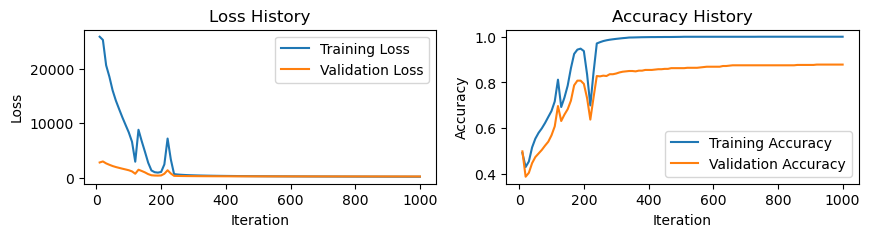

0

In [16]:
# Fit model 
model = LogisticRegression()
model.fit(X_train, y_train, X_val, y_val, 
          max_iter=1000, lr=0.01, lmbda=0.01, regularization='l2')
model.plot()

# play sound when finished
os.system(finish_sound)

In [17]:
class EvaluateModel():
    # Class to evaluate model performance, similar to sklearn.metrics ClassificationReport and ConfusionMatrix
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        
        result = self.classification_report()
        print('Accuracy is: ',result['f1-score']['accuracy'])
        print('F1 Score is: ',result['f1-score']['weighted avg'])
        print('\nClassification Report:')
        print(result)
        print('\nConfusion Matrix:')
        print(self.confusion_matrix())
    
    def accuracy_score(self, y_t, y_p):
        correct = sum(y_t == y_p)
        return correct / len(y_t)

    def scores(self, y_t, y_p, class_label= 1):
        true = y_t == class_label
        pred = y_p == class_label
        tp = sum(true & pred)
        fp = sum(~true & pred) 
        fn = sum(true & ~pred)
        tn = sum(~true & ~pred) 
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)
        return precision, recall, f1
    
    def confusion_matrix(self,labels=None):
        labels = labels if labels else sorted(set(self.y_true) | set(self.y_pred))        
        indexes = {v:i for i, v in enumerate(labels)}
        matrix = np.zeros((len(indexes),len(indexes))).astype(int)
        for t, p in zip(self.y_true, self.y_pred):
            matrix[indexes[t], indexes[p]] += 1
        # print('Confusion Matrix: ')
        # print(pd.DataFrame(matrix, index=labels, columns=labels))
        return pd.DataFrame(matrix, index=labels, columns=labels)

    def classification_report(self):
        output_dict = {}
        support_list = []
        precision_list = []
        recall_list = []
        f1_list = []
        for i in np.unique(self.y_true):
            support = sum(self.y_true == i)
            precision, recall, f1 = self.scores(self.y_true, self.y_pred, class_label=i)
            output_dict[i] = {'precision':precision, 'recall':recall, 'f1-score':f1, 'support':support}
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)
            support_list.append(support)
        support = np.sum(support_list)
        output_dict['accuracy'] = {'precision':0, 'recall':0, 'f1-score':self.accuracy_score(self.y_true, self.y_pred), 'support':support}
        # macro avg
        macro_precision = np.mean(precision_list)
        macro_recall = np.mean(recall_list)
        macro_f1 = np.mean(f1_list)
        output_dict['macro avg'] = {'precision':macro_precision, 'recall':macro_recall, 'f1-score':macro_f1, 'support':support}
        # weighted avg
        weighted_precision = np.average(precision_list, weights=support_list)
        weighted_recall = np.average(recall_list, weights=support_list)
        weighted_f1 = np.average(f1_list, weights=support_list)
        output_dict['weighted avg'] = {'precision':weighted_precision, 'recall':weighted_recall, 'f1-score':weighted_f1, 'support':support}
        # convert to dataframe and format
        report_d = pd.DataFrame(output_dict).T
        annot = report_d.copy()
        annot.iloc[:, 0:3] = (annot.iloc[:, 0:3]*100).applymap('{:.2f}'.format) + ' %'
        annot['support'] = annot['support'].astype(int)
        annot.loc['accuracy','precision'] = ''
        annot.loc['accuracy','recall'] = ''
        return annot

In [18]:
y_pred = model.predict(X_val)

results = EvaluateModel(y_val, y_pred)

Accuracy is:  87.81 %
F1 Score is:  87.86 %

Classification Report:
             precision   recall f1-score  support
0              92.60 %  90.00 %  91.28 %      320
1              85.59 %  87.50 %  86.53 %      224
2              77.66 %  82.02 %  79.78 %       89
3              83.33 %  71.43 %  76.92 %        7
accuracy                         87.81 %      640
macro avg      84.80 %  82.74 %  83.63 %      640
weighted avg   87.97 %  87.81 %  87.86 %      640

Confusion Matrix:
     0    1   2  3
0  288   19  12  1
1   20  196   8  0
2    3   13  73  0
3    0    1   1  5


In [156]:
y_pred = model.predict(X_test)

results = EvaluateModel(y_test, y_pred)

Accuracy is:  90.62 %
F1 Score is:  90.75 %

Classification Report:
             precision   recall f1-score  support
0              96.32 %  90.00 %  93.05 %      320
1              88.03 %  91.96 %  89.96 %      224
2              82.65 %  90.00 %  86.17 %       90
3              55.56 %  83.33 %  66.67 %        6
accuracy                         90.62 %      640
macro avg      80.64 %  88.82 %  83.96 %      640
weighted avg   91.12 %  90.62 %  90.75 %      640

Confusion Matrix:
     0    1   2  3
0  288   21  10  1
1    9  206   6  3
2    2    7  81  0
3    0    0   1  5
